Call: EasyLM LinearModel

Observations: 120
Parameters: 3
Degrees of Freedom (resid): 117

Coefficients:
    Coef.  Std.Err.  t value  Pr(>|t|)
0  4.9909    0.0831  60.0519    0.0000
1  1.0787    0.0900  11.9859    0.0000
2 -0.7759    0.0823  -9.4314    0.0000

Residual variance (sigma^2): 0.8173
R-squared: 0.6448
AIC: -21.2530
BIC: -12.8905
Prediction for X1=0.5, X2=-1.2: [6.46131677]


FitError: Failed to fit LinearModel: X must be convertible to a numpy.ndarray

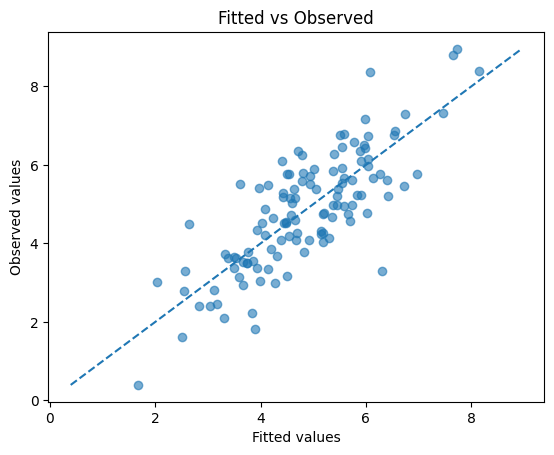

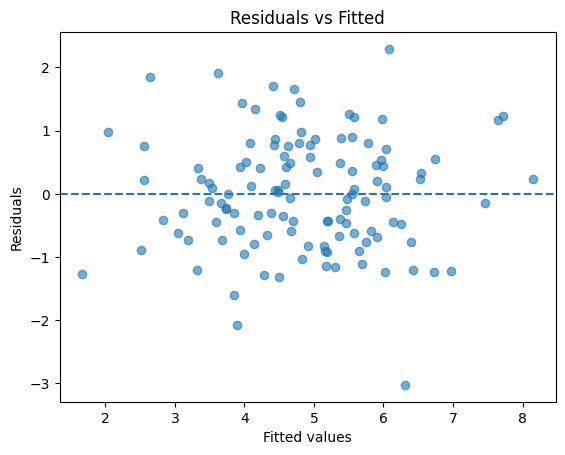

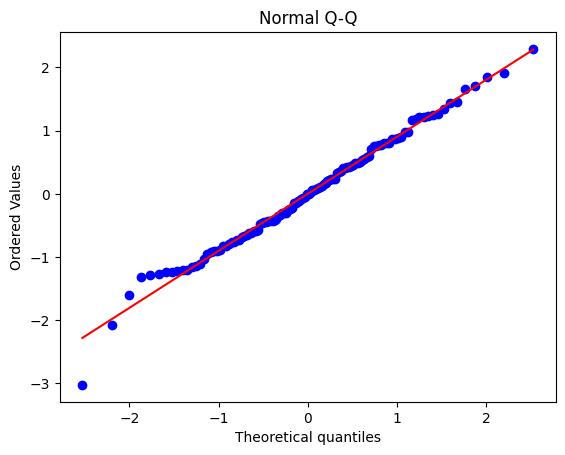

In [9]:
"""
Quick Start Example for EasyLM
(Use this as the content of quick_start.ipynb)
"""
import sys
import os

# Add the parent directory (project root) to Python's path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import importlib
import EasyLM.utils as utils

importlib.reload(utils)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from EasyLM import LinearModel, PlotHelper, ModelComparator

# ---------------------------------------
# 1. Load or simulate data
# ---------------------------------------
np.random.seed(42)
n = 120
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)
eps = np.random.normal(scale=1.0, size=n)

y = 5 + 1.2 * X1 - 0.9 * X2 + eps

df = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "y": y
})

df.head()

# ---------------------------------------
# 2. Fit a Linear Model
# ---------------------------------------
lm = LinearModel(add_intercept=True)
lm.name = "full_model"

X = df[["X1", "X2"]].to_numpy()
y = df["y"].to_numpy()

lm.fit(X, y)

print(lm.summary())
# ---------------------------------------
# 3. Predictions
# ---------------------------------------
new_data = np.array([[0.5, -1.2]])
pred = lm.predict(new_data)
print("Prediction for X1=0.5, X2=-1.2:", pred)

# ---------------------------------------
# 4. Diagnostic Plots
# ---------------------------------------
PlotHelper.plot_fitted_vs_observed(lm.fittedvalues_, df["y"])
PlotHelper.plot_residuals(lm.fittedvalues_, lm.residuals_)
PlotHelper.plot_qq(lm.residuals_)

# plt.show()   # uncomment when running interactively

# ---------------------------------------
# 5. Compare Two Models
# ---------------------------------------
lm2 = LinearModel(add_intercept=True)
lm2.name = "X1_only"
lm2.fit(df[["X1"]], df["y"])

comp = ModelComparator([lm, lm2])
print("\nModel comparison:")
print(comp.compare())

print("\nCoefficient comparison:")
print(comp.coef_table())
